<a href="https://colab.research.google.com/github/he16946/Assignment2020/blob/main/Assignment2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Classification

## Info 

---



This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). *Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column)*. The main aim of the data is to discriminate healthy people from those with PD, **according to "status" column which is set to 0 for healthy and 1 for PD**.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. *There are around six recordings per patient, the name of the patient is identified in the first column*.



---



### Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status

**Health status of the subject (one) - Parkinson's, (zero) - healthy**

RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


---



##imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import (cross_validate, cross_val_score)
from sklearn.metrics import make_scorer,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Data 

In [23]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

In [24]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [4]:
df.head(30)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
#how imbalanced is the data?

print('Positive', round(df['status'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Healthy', round(df['status'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Positive 75.38 % of the dataset
Healthy 24.62 % of the dataset


Text(0.5, 1.0, 'Class Distribution before/after Random Sampling')

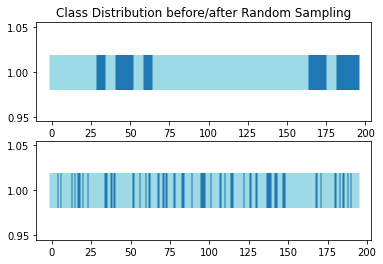

In [8]:
#randomize status distribution by taking random samples of data frame 
mixat = df.sample(n=194, replace= False, axis= 0, random_state = 36)

fig1, (ax1, ax2) = plt.subplots(ncols=1, nrows=2 )

ax1.scatter(range(len(df['status'])),  [1] * len(df['status']), c=df['status'], marker='_', lw=35, cmap='tab20')
ax2.scatter(range(len(mixat['status'])),  [1] * len(mixat['status']), c=mixat['status'], marker='_', lw=35, cmap='tab20') 

ax1.set_title('Class Distribution before/after Random Sampling')

In [9]:
#list of target values
target = mixat.pop('status')
names = mixat.pop('name')

#normalize df
mixat = ((mixat - mixat.min())/(mixat.max()-mixat.min()))

In [10]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(mixat, target, shuffle= False, train_size = 0.8)

###Classification

In [ ]:
# "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
#         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#         "Naive Bayes", "QDA"

In [ ]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

print(accuracy_score(y_test,dt.predict(x_test)))

0.9230769230769231


In [ ]:
clf = ExtraTreesClassifier(n_estimators=200, max_depth=4)
clf.fit(x_train,y_train)

print(accuracy_score(y_test,clf.predict(x_test)))

0.9487179487179487


In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc = rfc.fit(x_train, y_train)

print(accuracy_score(y_test, rfc.predict(x_test)))

0.9487179487179487


In [ ]:
abc = AdaBoostClassifier(n_estimators=200)

abc.fit(x_train, y_train)
print(accuracy_score(y_test, abc.predict(x_test)))

0.9230769230769231


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=2,
                                 random_state=0)
gbc.fit(x_train, y_train)

gbc.score(x_test, y_test)

0.9230769230769231

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Training classifiers
bagging = BaggingClassifier(KNeighborsClassifier(),
                       max_samples=0.6, max_features=0.6)
knc = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma=.1, kernel='rbf', probability=True)
lr = LogisticRegression(random_state=1)
gnb = GaussianNB()
vc = VotingClassifier(estimators=[('lr', lr),  ('gnb', gnb), ('knn', knc), 
                                   ('svc', svc)],  voting='soft')
knc.fit(x_train, y_train)
svc.fit(x_train, y_train)
vc.fit(x_train, y_train)
gnb.fit(x_train, y_train)
lr.fit(x_train, y_train)
bagging.fit(x_train, y_train)

for clf, label in zip([knc, svc, vc, lr, gnb, bagging], ['K Neighbors', 'SVC','Voting Classifier', 
                                                'Logistic Regression', 'GaussianNB',
                                                'Bagging Classifier']):
  
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=15)
    #print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    predict_scores = accuracy_score(y_test,clf.predict(x_test))
    #print("Predict on test data: %0.3f" % predict_scores)

0.9290909090909092
0.8333333333333335
0.893939393939394
0.8260606060606062
0.7096969696969696
0.9036363636363638


In [51]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=None)
abc = AdaBoostClassifier(n_estimators=100)
rfc = RandomForestClassifier(n_estimators=100, max_depth = None, min_samples_split =2,
                             random_state =0, oob_score=True)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=None)
dt = tree.DecisionTreeClassifier()

dt.fit(x_train, y_train)
etc.fit(x_train,y_train)
rfc.fit(x_train, y_train)
abc.fit(x_train, y_train)
gbc.fit(x_train, y_train)

for clf, label in zip([dt, etc, rfc, abc, gbc], ['Decision Tree', 'Extra Tree',
                                                 'Random Forest', 'Ada Boost', 'Gradient Boost']):
    scores = cross_val_score(clf, x_test, y_test, scoring='accuracy', cv=7)
    predict_scores = accuracy_score(y_test,clf.predict(x_test))
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    print("Predict on test data: %0.3f" % predict_scores)

Accuracy: 0.743 (+/- 0.126) [Decision Tree]
Predict on test data: 0.923
Accuracy: 0.919 (+/- 0.094) [Extra Tree]
Predict on test data: 0.949
Accuracy: 0.919 (+/- 0.094) [Random Forest]
Predict on test data: 0.949
Accuracy: 0.848 (+/- 0.141) [Ada Boost]
Predict on test data: 0.923
Accuracy: 0.819 (+/- 0.127) [Gradient Boost]
Predict on test data: 0.872


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42, tol = 0.003)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)


reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.24


In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.6, max_features=0.6)

bagging.fit(x_train, y_train)

scores = cross_val_score(bagging, x_train, y_train, scoring='accuracy', cv=7)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))
predict_scores = accuracy_score(y_test,bagging.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

Accuracy: 0.871 (+/- 0.044)
Predict on test data: 0.949


No handles with labels found to put in legend.


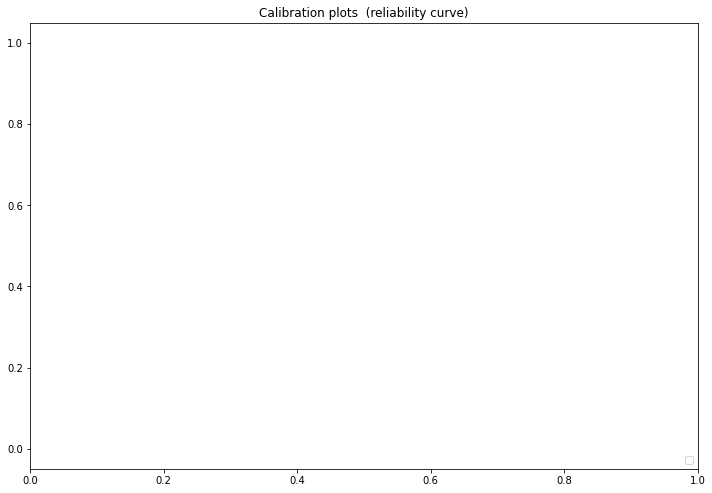

In [61]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
print(clf.score(x_test, y_test))
scores = cross_val_score(clf, x_test, y_test, cv=7)
print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

0.9487179487179487
Accuracy: 0.919 (+/- 0.094) [Gradient Boost]


## 3ak

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x_train, y_train)
print(accuracy_score(y_test,dummy.predict(x_test)))

0.46153846153846156


In [ ]:
minimal = mixat[['PPE', 'MDVP:RAP','MDVP:Fo(Hz)', 'RPDE']]

x1_train, x1_test, y1_train, y1_test = train_test_split(minimal, target, shuffle= False, train_size = 0.8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (cross_validate, cross_val_score, KFold,
                                      train_test_split, StratifiedKFold, 
                                       StratifiedShuffleSplit)

dt = DecisionTreeClassifier(min_samples_split = 40, max_depth = 50, random_state = 32)
dt.fit(x_train, y_train)
print("DT score: ", dt.score(x_test, y_test))
print("Train score: ", cross_validate(dt, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(dt, x_test, y_test)['test_score'].mean())

DT score:  0.8717948717948718
Train score:  0.8387096774193548
Test score:  0.8214285714285714


In [ ]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x1_train, y1_train)
dummy.score(x1_test, y1_test)

0.46153846153846156

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (cross_validate, cross_val_score, KFold,
                                      train_test_split, StratifiedKFold, 
                                       StratifiedShuffleSplit)

dt = DecisionTreeClassifier(min_samples_split = 40, max_depth = 50, random_state = 32)
dt.fit(x_train, y_train)
print("DT score: ", dt.score(x_test, y_test))
print("Train score: ", cross_validate(dt, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(dt, x_test, y_test)['test_score'].mean())

DT score:  0.8717948717948718
Train score:  0.8387096774193548
Test score:  0.8214285714285714


In [ ]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]


features = list(mixat.columns[0:30])

r = mixat[features]


print("Feature ranking:")
for f in range(r.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. PPE (0.762908)
2. MDVP:RAP (0.142336)
3. MDVP:Fo(Hz) (0.079526)
4. RPDE (0.015230)
5. spread1 (0.000000)
6. MDVP:Shimmer (0.000000)
7. MDVP:Fhi(Hz) (0.000000)
8. MDVP:Flo(Hz) (0.000000)
9. MDVP:Jitter(%) (0.000000)
10. MDVP:Jitter(Abs) (0.000000)
11. spread2 (0.000000)
12. MDVP:PPQ (0.000000)
13. Jitter:DDP (0.000000)
14. MDVP:Shimmer(dB) (0.000000)
15. DFA (0.000000)
16. D2 (0.000000)
17. Shimmer:APQ5 (0.000000)
18. MDVP:APQ (0.000000)
19. Shimmer:DDA (0.000000)
20. NHR (0.000000)
21. HNR (0.000000)
22. Shimmer:APQ3 (0.000000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_depth = 35, random_state = 32)
rf.fit(x_train, y_train)
print("DT score: ", rf.score(x_test, y_test))
print("Train score: ", cross_validate(rf, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(rf, x_test, y_test)['test_score'].mean())

DT score:  0.9487179487179487
Train score:  0.903225806451613
Test score:  0.9214285714285714


In [ ]:
rf = RandomForestClassifier(n_estimators = 500, max_depth = 35, random_state = 32)
rf.fit(x1_train, y1_train)
print("DT score: ", rf.score(x1_test, y1_test))
print("Train score: ", cross_validate(rf, x1_train, y1_train)['test_score'].mean())
print("Test score: ", cross_validate(rf, x1_test, y1_test)['test_score'].mean())

DT score:  0.9487179487179487
Train score:  0.9096774193548388
Test score:  0.8964285714285714
